In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.2 MB/s 


In [ ]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics import accuracy_score, recall_score
from wordcloud import WordCloud  
from sklearn import svm

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Prediction Analysis/datasets/SesudahProcessingtfidf.csv")

In [ ]:
data.head()

,Unnamed: 0,Comment,Label,Comment_Bersih,Comment_Tokenizing
0,0,Kebijakan yang membuat masyarakat semakin terp...,0,kebijakan yang membuat masyarakat semakin terp...,"['bijak', 'masyarakat', 'puruk', 'anda', 'nya'..."
1,1,tidak jadi buat SIM. tidak jadi perpanjang STN...,0,tidak jadi buat sim tidak jadi perpanjang stnk...,"['sim', 'panjang', 'stnk', 'jual', 'tanahgimana']"
2,2,Jangan kau tanyakan apa yang telah negara beri...,0,jangan kau tanyakan apa yang telah negara beri...,"['kau', 'negara', 'pada', 'tanya', 'kau', 'neg..."
3,3,Gimana kok jadi ruwet gini...,0,gimana kok jadi ruwet gini,"['gimana', 'ruwet', 'gin']"
4,4,Bertambah lagi beban pengeluaran jadi punya hu...,0,bertambah lagi beban pengeluaran jadi punya hu...,"['tambah', 'beban', 'keluar', 'hutang', 'bulan..."


In [ ]:
data.Label.value_counts()

0    2912
1     148
Name: Label, dtype: int64

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(data['Comment_Tokenizing'],data['Label'],test_size=0.25)

In [ ]:
print("Perbandingan Jumlah Data Uji dan Latih Pembagian Data 75:25")
print("Data Latih   : ",Train_X.size)
print("Data Uji     : ",Test_X.size)

Perbandingan Jumlah Data Uji dan Latih Pembagian Data 75:25
Data Latih   :  2295
Data Uji     :  765


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['Comment_Tokenizing'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print(Test_X_Tfidf)
print(Train_X_Tfidf)

  (0, 3628)	0.6954927218252184
  (0, 728)	0.5642847836709526
  (0, 364)	0.4448286825347209
  (1, 4389)	0.3363529666079293
  (1, 3497)	0.16345653325439416
  (1, 2437)	0.5480420761645788
  (1, 2314)	0.3846223903348039
  (1, 1781)	0.4302071588775435
  (1, 1566)	0.4359294550823022
  (1, 530)	0.1917066869960962
  (2, 4666)	0.2742977030605566
  (2, 4418)	0.25711644321388305
  (2, 3620)	0.28815553222411194
  (2, 3514)	0.40142278011160104
  (2, 3505)	0.3818912668961322
  (2, 3306)	0.36803343773257685
  (2, 3209)	0.183084567696702
  (2, 2873)	0.30436361475646256
  (2, 2824)	0.25363271075664506
  (2, 2817)	0.24934805354724962
  (2, 615)	0.2837733635671092
  (3, 4183)	0.48672928310128094
  (3, 3806)	0.5838567740985199
  (3, 2590)	0.47109524903231564
  (3, 457)	0.4475211041394177
  :	:
  (760, 1898)	0.27171896391170536
  (760, 1790)	0.18566930271932794
  (760, 1607)	0.19504952519035917
  (760, 694)	0.27171896391170536
  (760, 508)	0.27171896391170536
  (760, 402)	0.22267669834690992
  (760, 192)	0

## **SVM Linear**

In [ ]:
import time
from sklearn.svm import SVC
start = time.time() 

svm_classifiertf = SVC(kernel='linear', C=2.33, probability=True)
svm_classifiertf.fit(Train_X_Tfidf,Train_Y)
y_pred1 = svm_classifiertf.predict(Test_X_Tfidf)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 0.99 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifiertf,Train_X_Tfidf,Train_Y,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.95217391 0.94782609 0.93478261 0.95652174 0.94782609 0.93886463
 0.95196507 0.94323144 0.95196507 0.95633188]
Mean: 0.948 (0.007)


In [ ]:
svnsm = round(accuracy_score(Test_Y, y_pred1),2)
print('Akurasi Kernel Linear :',svnsm)

Akurasi Kernel Linear : 0.95


Confusion matrix, without normalization


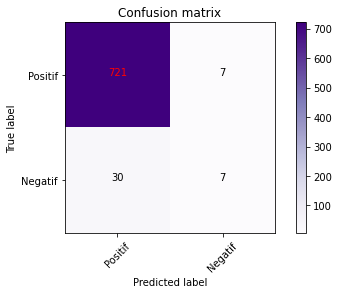

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(Test_Y, y_pred1)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(Test_Y, y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       728
           1       0.50      0.19      0.27        37

    accuracy                           0.95       765
   macro avg       0.73      0.59      0.62       765
weighted avg       0.94      0.95      0.94       765



## **SVM Kernel RBF**

In [ ]:
import time
from sklearn.svm import SVC
start = time.time() 

svm_classifiertfrb = SVC(kernel='linear', C=2.33, probability=True)
svm_classifiertfrb.fit(Train_X_Tfidf,Train_Y)
y_pred2 = svm_classifiertfrb.predict(Test_X_Tfidf)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 1.24 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifiertfrb,Train_X_Tfidf,Train_Y,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.95217391 0.94782609 0.93478261 0.95652174 0.94782609 0.93886463
 0.95196507 0.94323144 0.95196507 0.95633188]
Mean: 0.948 (0.007)


In [ ]:
svnsmrb = round(accuracy_score(Test_Y, y_pred2),2)
print('Akurasi Kernel RBF :',svnsmrb)

Akurasi Kernel RBF : 0.95


Confusion matrix, without normalization


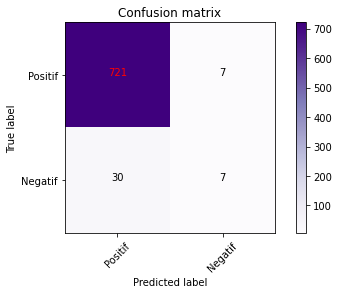

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(Test_Y, y_pred2)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(Test_Y, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       728
           1       0.50      0.19      0.27        37

    accuracy                           0.95       765
   macro avg       0.73      0.59      0.62       765
weighted avg       0.94      0.95      0.94       765



## **SVM Kernel Sigmoid**

In [ ]:
import time
from sklearn.svm import SVC
start = time.time() 

svm_classifiertfsg = SVC(kernel='linear', C=2.33, probability=True)
svm_classifiertfsg.fit(Train_X_Tfidf,Train_Y)
y_pred3 = svm_classifiertfsg.predict(Test_X_Tfidf)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 1.28 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifiertfsg,Train_X_Tfidf,Train_Y,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.95217391 0.94782609 0.93478261 0.95652174 0.94782609 0.93886463
 0.95196507 0.94323144 0.95196507 0.95633188]
Mean: 0.948 (0.007)


In [ ]:
svnsmsg = round(accuracy_score(Test_Y, y_pred3),2)
print('Akurasi Kernel SIgmoid :',svnsmsg)

Akurasi Kernel SIgmoid : 0.95


Confusion matrix, without normalization


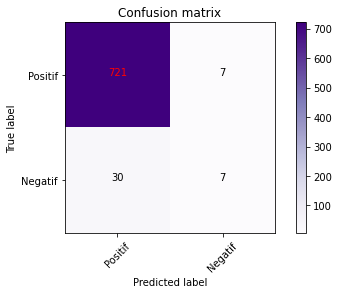

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(Test_Y, y_pred3)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(Test_Y, y_pred3))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       728
           1       0.50      0.19      0.27        37

    accuracy                           0.95       765
   macro avg       0.73      0.59      0.62       765
weighted avg       0.94      0.95      0.94       765



## **SVM Kernel Polynomial**

In [ ]:
import time
from sklearn.svm import SVC
start = time.time() 

svm_classifiertfpl = SVC(kernel='linear', C=2.33, probability=True)
svm_classifiertfpl.fit(Train_X_Tfidf,Train_Y)
y_pred4 = svm_classifiertfpl.predict(Test_X_Tfidf)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 1.31 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifiertfpl,Train_X_Tfidf,Train_Y,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.95217391 0.94782609 0.93478261 0.95652174 0.94782609 0.93886463
 0.95196507 0.94323144 0.95196507 0.95633188]
Mean: 0.948 (0.007)


In [ ]:
svnsmpl = round(accuracy_score(Test_Y, y_pred4),2)
print('Akurasi Kernel Polynomial :',svnsmpl)

Akurasi Kernel Polynomial : 0.95


Confusion matrix, without normalization


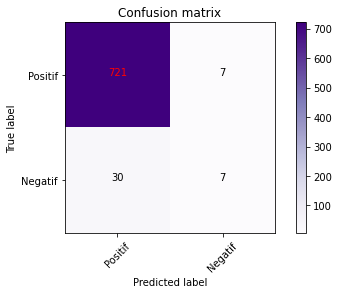

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(Test_Y, y_pred4)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(Test_Y, y_pred4))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       728
           1       0.50      0.19      0.27        37

    accuracy                           0.95       765
   macro avg       0.73      0.59      0.62       765
weighted avg       0.94      0.95      0.94       765



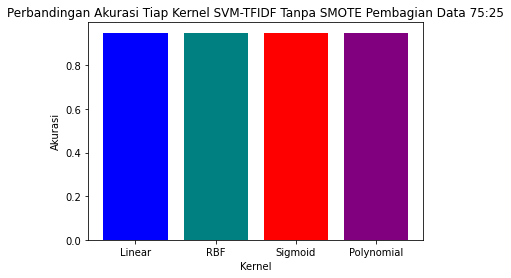

In [ ]:
kernel = ['Linear', 'RBF','Sigmoid','Polynomial']
model = [svnsm,svnsmrb,svnsmsg,svnsmpl]
ncolors = ['blue', 'teal', 'red', 'purple']

plt.bar(kernel, model, color=ncolors)
plt.title('Perbandingan Akurasi Tiap Kernel SVM-TFIDF Tanpa SMOTE Pembagian Data 75:25')
plt.xlabel('Kernel')
plt.ylabel('Akurasi')
plt.show()

## **SMOTE**

In [ ]:
X = Tfidf_vect.fit_transform(data['Comment_Tokenizing'])

In [ ]:
y = data['Label']

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print(f'Dataset sebelum SMOTE : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Dataset sesudah SMOTE : {Counter(y_res)}')

Dataset sebelum SMOTE : Counter({0: 2912, 1: 148})
Dataset sesudah SMOTE : Counter({0: 2912, 1: 2912})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [ ]:
print("Perbandingan Jumlah Data Uji dan Latih Pembagian Data 75:25")
print("Data Latih : ",y_train.size)
print("Data Uji   : ",y_test.size)

Perbandingan Jumlah Data Uji dan Latih Pembagian Data 75:25
Data Latih :  4368
Data Uji   :  1456


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4368, 5000)
(4368,)
(1456, 5000)
(1456,)


## **SVM Kernel Linear dengan SMOTE**

In [ ]:
start = time.time() 

svm_classifierSM = SVC(kernel='linear', C=2.33, probability=True)
svm_classifierSM.fit(X_train,y_train)
y_predsm = svm_classifierSM.predict(X_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 6.08 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifierSM,X_train,y_train,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.9382151  0.95881007 0.94965675 0.93592677 0.95423341 0.9382151
 0.94508009 0.94508009 0.93348624 0.94724771]
Mean: 0.945 (0.008)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score
accusm = round(accuracy_score(y_test, y_predsm),2)
print('Akurasi Kernel Linear :',accusm)

Akurasi Kernel Linear : 0.95


Confusion matrix, without normalization


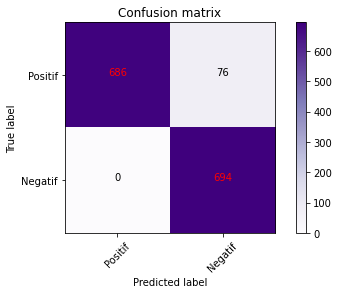

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_predsm)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predsm))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       762
           1       0.90      1.00      0.95       694

    accuracy                           0.95      1456
   macro avg       0.95      0.95      0.95      1456
weighted avg       0.95      0.95      0.95      1456



## **SVM Kernel RBF SMOTE**

In [ ]:
start = time.time() 

svm_classifierSMRB = SVC(kernel='rbf', C=2.33, gamma=0.45, probability=True)
svm_classifierSMRB.fit(X_train,y_train)
y_predrb = svm_classifierSMRB.predict(X_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 4.33 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifierSMRB,X_train,y_train,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.98855835 0.99771167 0.99313501 0.99084668 0.99542334 1.
 0.98855835 0.99542334 0.99311927 0.99311927]
Mean: 0.994 (0.004)


In [ ]:
accusmrb = round(accuracy_score(y_test, y_predrb),2)
print('Akurasi Kernel RBF :',accusmrb)

Akurasi Kernel RBF : 0.99


Confusion matrix, without normalization


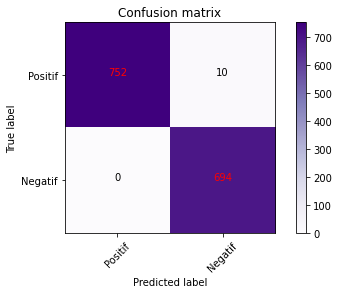

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_predrb)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predrb))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       762
           1       0.99      1.00      0.99       694

    accuracy                           0.99      1456
   macro avg       0.99      0.99      0.99      1456
weighted avg       0.99      0.99      0.99      1456



## **Kernel Sigmoid SMOTE**

In [ ]:
start = time.time() 

svm_classifierSMSG = SVC(kernel='sigmoid', C=2.33, probability=True)
svm_classifierSMSG.fit(X_train,y_train)
y_predsg = svm_classifierSMSG.predict(X_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 5.29 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifierSMSG,X_train,y_train,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.89702517 0.92906178 0.90389016 0.90389016 0.89702517 0.89016018
 0.90160183 0.91304348 0.91513761 0.91513761]
Mean: 0.907 (0.011)


In [ ]:
accusmsg = round(accuracy_score(y_test, y_predsg),2)
print('Akurasi Kernel Sigmoid :',accusmsg)

Akurasi Kernel Sigmoid : 0.9


Confusion matrix, without normalization


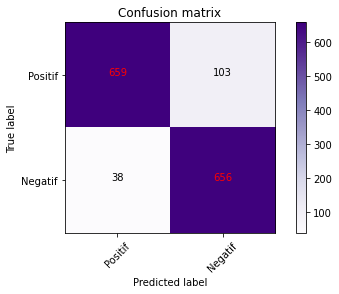

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_predsg)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predsg))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       762
           1       0.86      0.95      0.90       694

    accuracy                           0.90      1456
   macro avg       0.90      0.91      0.90      1456
weighted avg       0.91      0.90      0.90      1456



## **Kernel Polynomial SMOTE**

In [ ]:
start = time.time() 

svm_classifierSMPL = SVC(kernel='poly', C=2.33, probability=True)
svm_classifierSMPL.fit(X_train,y_train)
y_predpl = svm_classifierSMPL.predict(X_test)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 10.63 seconds


In [ ]:
#K-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sv = SVC()
kf = KFold(n_splits=10,shuffle=True, random_state=123)
cv_scores = cross_val_score(svm_classifierSMPL,X_train,y_train,cv=10)
print(cv_scores)
print('Mean: %.3f (%.3f)'%(cv_scores.mean(),cv_scores.std()))

[0.80320366 0.84439359 0.82379863 0.83524027 0.8375286  0.8375286
 0.81922197 0.81235698 0.81422018 0.82798165]
Mean: 0.826 (0.013)


In [ ]:
accusmpl = round(accuracy_score(y_test, y_predpl),2)
print('Akurasi Kernel Polynomial :',accusmpl)

Akurasi Kernel Polynomial : 0.83


Confusion matrix, without normalization


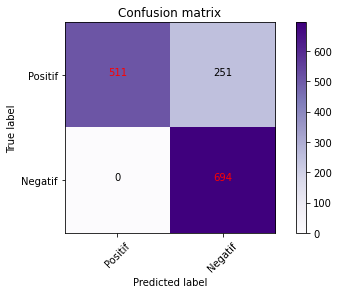

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm = metrics.confusion_matrix(y_test, y_predpl)
plot_confusion_matrix(cm, classes = ['Positif','Negatif'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_predpl))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80       762
           1       0.73      1.00      0.85       694

    accuracy                           0.83      1456
   macro avg       0.87      0.84      0.82      1456
weighted avg       0.87      0.83      0.82      1456



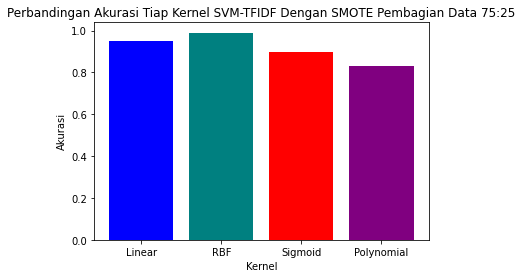

In [ ]:
kernel = ['Linear', 'RBF','Sigmoid','Polynomial']
model = [accusm,accusmrb,accusmsg,accusmpl]
ncolors = ['blue', 'teal', 'red', 'purple']

plt.bar(kernel, model, color=ncolors)
plt.title('Perbandingan Akurasi Tiap Kernel SVM-TFIDF Dengan SMOTE Pembagian Data 75:25')
plt.xlabel('Kernel')
plt.ylabel('Akurasi')
plt.show()